<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/%EC%B5%9C%EC%A2%85%EB%B3%B5%EC%8A%B5_%EC%BD%94%EB%93%9C%ED%8E%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cafedobby","key":"9e845a7cf914e478dc664962566e8364"}'}

In [2]:
!ls

kaggle.json  sample_data


In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d andrewmvd/animal-faces

 98% 685M/696M [00:06<00:00, 46.7MB/s]
100% 696M/696M [00:06<00:00, 108MB/s] 


In [6]:
!unzip animal-faces

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/flickr_wild_00139

In [7]:
ROOT_DIR = './afhq'
TRAIN_DIR = './afhq/train'
VALID_DIR = './afhq/val'

In [8]:
from os import listdir
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from os import listdir
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [9]:
listdir(ROOT_DIR)

['train', 'val']

In [10]:
class_counts = []
for folder in listdir(TRAIN_DIR) : 
    print(folder, '\t', len(listdir('{}/{}'.format(TRAIN_DIR, folder))))
    class_counts.append(len(listdir('{}/{}'.format(TRAIN_DIR, folder))))

wild 	 4738
dog 	 4739
cat 	 5153


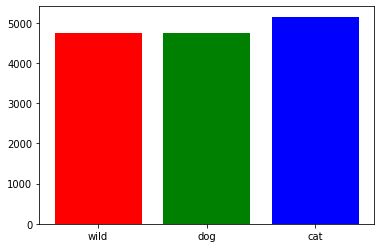

In [11]:
plt.bar(listdir(TRAIN_DIR), class_counts, color=['r', 'g', 'b'])
plt.show()

In [12]:
class_counts = []
for folder in listdir(VALID_DIR) : 
    print(folder, '\t', len(listdir('{}/{}'.format(VALID_DIR, folder))))
    class_counts.append(len(listdir('{}/{}'.format(VALID_DIR, folder))))

wild 	 500
dog 	 500
cat 	 500


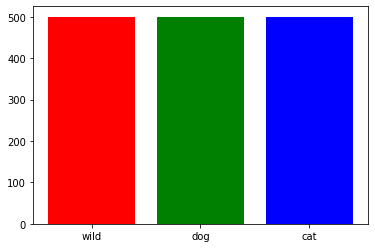

In [13]:
plt.bar(listdir(VALID_DIR), class_counts, color=['r', 'g', 'b'])
plt.show()

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


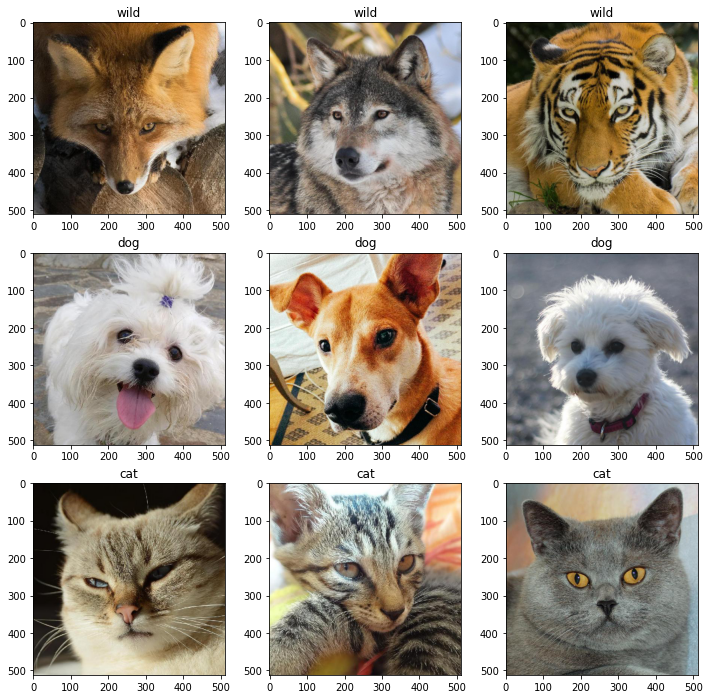

In [14]:
# 이미지 확인
plt.figure(figsize=(12, 12))
for i, folder in enumerate(listdir(TRAIN_DIR)) : 
    for j in range(3) : 
        img_directory = '{}/{}'.format(TRAIN_DIR, folder)
        random_img= random.choice(listdir('{}/{}'.format(TRAIN_DIR, folder)))
        plt.subplot(3, 3, j+1+(i*3))
        img = mpimg.imread(img_directory + '/' + random_img)
        plt.title(folder)
        plt.imshow(img)
        print(img.shape)
plt.show()

In [15]:
# 이미지 스케일 확인
img = mpimg.imread(TRAIN_DIR + '/cat/'  + listdir(TRAIN_DIR + '/cat')[0])
print(img)

[[[ 94 213 247]
  [ 98 217 251]
  [102 221 255]
  ...
  [ 98 218 253]
  [ 98 218 253]
  [ 99 219 254]]

 [[ 96 215 249]
  [ 98 217 251]
  [101 220 254]
  ...
  [ 98 218 253]
  [ 97 217 252]
  [ 97 217 252]]

 [[ 98 217 251]
  [ 99 218 252]
  [ 99 218 252]
  ...
  [ 95 215 250]
  [ 95 215 250]
  [ 94 214 249]]

 ...

 [[ 19  19  21]
  [ 16  16  18]
  [ 14  14  16]
  ...
  [ 57 186 252]
  [ 57 186 252]
  [ 57 186 252]]

 [[ 21  21  23]
  [ 17  17  19]
  [ 13  13  15]
  ...
  [ 57 186 254]
  [ 57 186 254]
  [ 57 186 254]]

 [[ 23  23  25]
  [ 17  17  19]
  [ 12  12  14]
  ...
  [ 57 186 254]
  [ 57 186 254]
  [ 57 186 254]]]


In [16]:
train_gen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
)

valid_gen = ImageDataGenerator(rescale=1./255)

In [17]:
train_set = train_gen.flow_from_directory(TRAIN_DIR, target_size=(224, 224), batch_size=32, class_mode='categorical')
valid_set = valid_gen.flow_from_directory(VALID_DIR, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [18]:
from tensorflow.keras.applications import InceptionV3

In [19]:
base_model = InceptionV3(include_top=False, input_shape=(224, 224, 3))

87924736/87910968 [==============================] - 1s 0us/step


In [20]:
base_model.trainable = False

In [21]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [22]:
model = Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [25]:
from collections import Counter

In [26]:
counter = Counter(train_set.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}                     

In [27]:
class_weights

{0: 1.0, 1: 1.0873602025743827, 2: 1.0875897002954833}

In [28]:
hist = model.fit(train_set, validation_data=valid_set, class_weight=class_weights, batch_size=32, callbacks=[early_stopping], epochs=30)

Epoch 1/30
458/458 [==============================] - 149s 251ms/step - loss: 0.2469 - accuracy: 0.9915 - val_loss: 0.3253 - val_accuracy: 0.9933
Epoch 2/30
458/458 [==============================] - 113s 246ms/step - loss: 0.0816 - accuracy: 0.9960 - val_loss: 0.6217 - val_accuracy: 0.9767
Epoch 3/30
458/458 [==============================] - 109s 237ms/step - loss: 0.1212 - accuracy: 0.9964 - val_loss: 0.2965 - val_accuracy: 0.9953
Epoch 4/30
458/458 [==============================] - 108s 236ms/step - loss: 0.0327 - accuracy: 0.9981 - val_loss: 0.3348 - val_accuracy: 0.9980
Epoch 5/30
458/458 [==============================] - 110s 240ms/step - loss: 0.0115 - accuracy: 0.9989 - val_loss: 0.3236 - val_accuracy: 0.9960
Epoch 6/30
458/458 [==============================] - 111s 243ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.3143 - val_accuracy: 0.9973


In [29]:
model.save('./animal_face.h5')

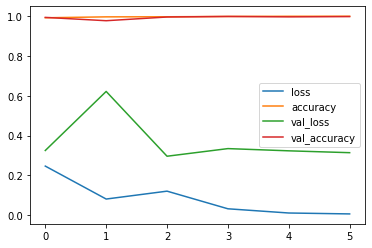

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])

plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()